# Organizational Overview

# Data Collection and Understanding

In [334]:
import pandas as pd
# df = pd.read_csv("titanic.csv")
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Preprocessing and EDA Feature Engineering

In [335]:
print(df.shape)
print(df.size)

(891, 15)
13365


In [336]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [337]:
print(df["age"].mean())
print(df["age"].median())
print(df["age"].mode()[0])
print(df["age"].std())
print(df["age"].var())


29.69911764705882
28.0
24.0
14.526497332334044
211.0191247463081


In [338]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [339]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [340]:
print(df["fare"].skew())
print(df["fare"].kurt())
print(df["age"].skew())
print(df["age"].kurt())

4.787316519674893
33.39814088089868
0.38910778230082704
0.17827415364210353


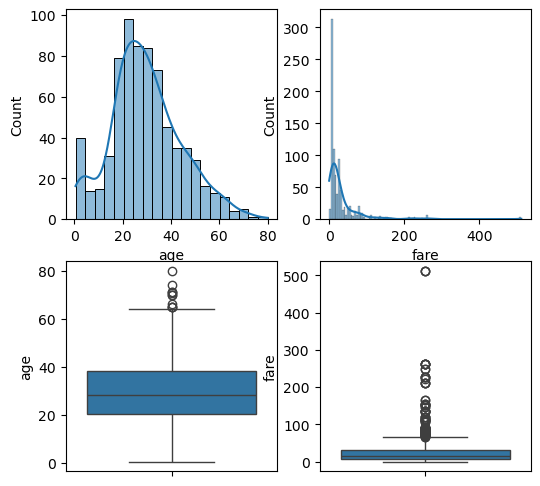

In [341]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.subplot(2,2, 1)
sns.histplot(df["age"], kde=True)

plt.subplot(2,2, 2)
sns.histplot(df["fare"], kde=True)

plt.subplot(2,2, 3)
sns.boxplot(df["age"])

plt.subplot(2,2, 4)
sns.boxplot(df["fare"])


plt.show()

<Axes: ylabel='age'>

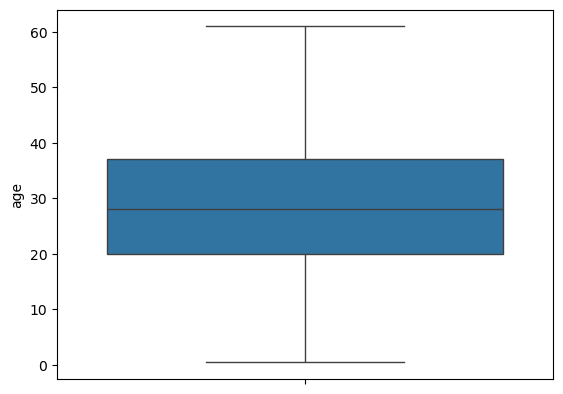

In [342]:
removed_df = df[df["age"] < 62]
sns.boxplot(removed_df["age"])


In [343]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [344]:
print(df["deck"].unique())

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [345]:
df["embarked"].mode()

0    S
Name: embarked, dtype: object

In [346]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)
df["deck"] = df["deck"].cat.add_categories("H")
df["deck"].fillna("H", inplace=True)

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [347]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

110
0


In [348]:
df.head()
cat_cols = ["sex", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone"]

from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [349]:
feature_cols = df.drop(columns=["survived"]).columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df[feature_cols]  = scaler.fit_transform(df[feature_cols])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0.888194,0.774861,-0.554151,0.481309,-0.498347,-0.526784,0.587763,0.888194,-0.351237,0.862151,0.555399,0.587763,-0.839786,-1.144837
1,1,-1.451367,-1.290554,0.608990,0.481309,-0.498347,0.699803,-1.900274,-1.451367,1.271934,-1.159890,-1.766694,-1.900274,1.190780,-1.144837
2,1,0.888194,-1.290554,-0.263365,-0.531904,-0.498347,-0.513854,0.587763,0.888194,1.271934,-1.159890,0.555399,0.587763,1.190780,0.873487
3,1,-1.451367,-1.290554,0.390901,0.481309,-0.498347,0.351494,0.587763,-1.451367,1.271934,-1.159890,-1.766694,0.587763,1.190780,-1.144837
4,0,0.888194,0.774861,0.390901,-0.531904,-0.498347,-0.511460,0.587763,0.888194,-0.351237,0.862151,0.555399,0.587763,-0.839786,0.873487


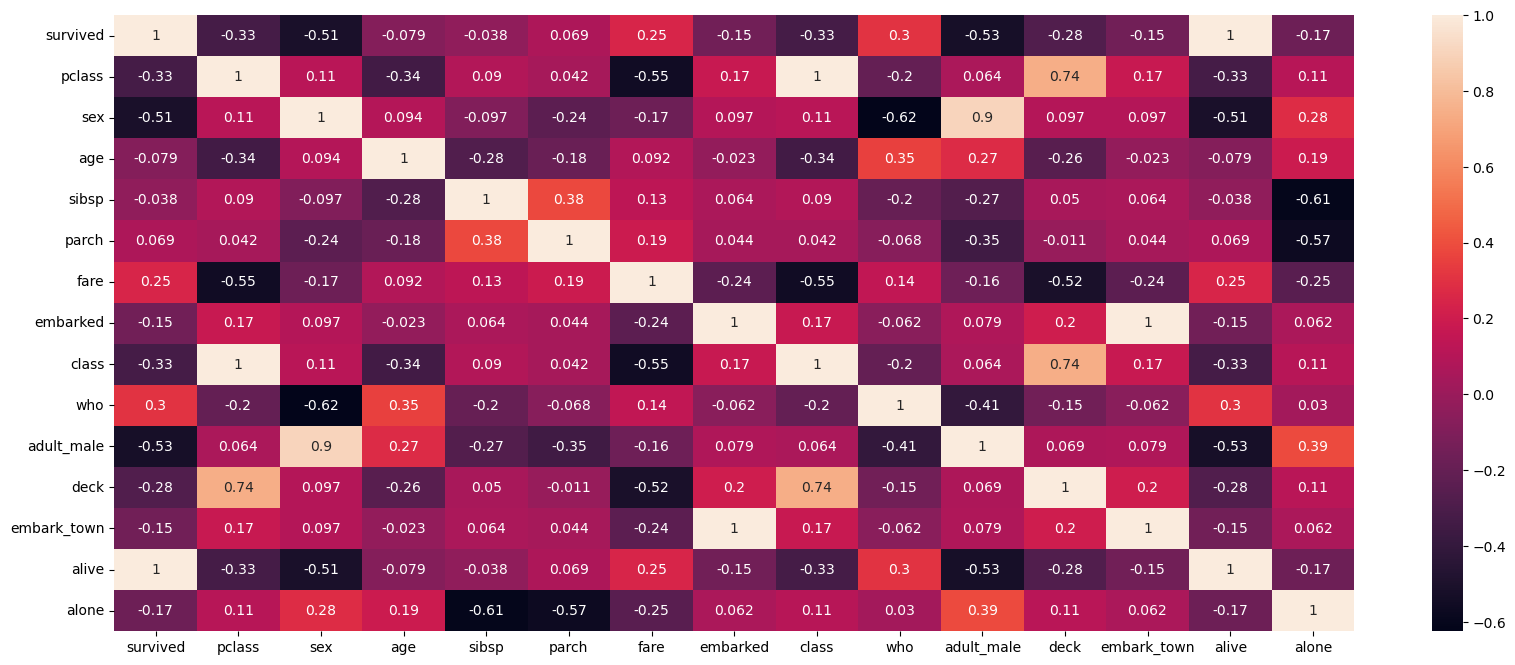

In [350]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [351]:
to_remove = ["alive", "age", "sibsp", "parch", "embark_town", "pclass", "adult_male"]
df = df.drop(columns=to_remove)

In [352]:
df.head()

,survived,sex,fare,embarked,class,who,deck,alone
0,0,0.774861,-0.526784,0.587763,0.888194,-0.351237,0.555399,-1.144837
1,1,-1.290554,0.699803,-1.900274,-1.451367,1.271934,-1.766694,-1.144837
2,1,-1.290554,-0.513854,0.587763,0.888194,1.271934,0.555399,0.873487
3,1,-1.290554,0.351494,0.587763,-1.451367,1.271934,-1.766694,-1.144837
4,0,0.774861,-0.511460,0.587763,0.888194,-0.351237,0.555399,0.873487


# Data Splitting

In [353]:
X = df.drop(columns=["survived"])
y = df["survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(585, 7) (196, 7) (585,) (196,)


# Modelling

- choose a classification model (KNN, Decision tree)
- train it
- test it
- calculate confusion matrix

In [354]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=14, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=42)

In [355]:
y_pred = model.predict(X_test)
print(list(y_test[:5]))
print(list(y_pred[:5]))

[0, 1, 0, 1, 0]
[1, 0, 1, 1, 0]


In [356]:
# plot_tree(model)
# plt.show()

In [357]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


[[95 22]
 [23 56]]
0.7704081632653061
0.717948717948718
0.7088607594936709
0.713375796178344


In [358]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[109   8]
 [ 33  46]]
0.7908163265306123
0.8518518518518519
0.5822784810126582
0.6917293233082706


In [359]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[97 20]
 [22 57]]
0.7857142857142857
0.7402597402597403
0.7215189873417721
0.7307692307692307


In [360]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=35)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[105  12]
 [ 27  52]]
0.8010204081632653
0.8125
0.6582278481012658
0.7272727272727273


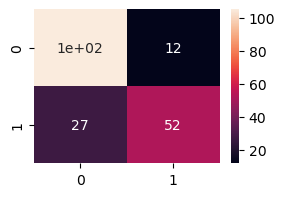

In [361]:
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True)
plt.show()

In [364]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       117
           1       0.77      0.68      0.72        79

    accuracy                           0.79       196
   macro avg       0.79      0.77      0.78       196
weighted avg       0.79      0.79      0.79       196



In [363]:
for k in range(3, 52, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("when k is: ", k)
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred))

when k is:  3
0.7806122448979592
0.7034482758620689
when k is:  5
0.7755102040816326
0.6986301369863013
when k is:  7
0.7806122448979592
0.6814814814814815
when k is:  9
0.7806122448979592
0.6950354609929077
when k is:  11
0.7704081632653061
0.6808510638297873
when k is:  13
0.7653061224489796
0.676056338028169
when k is:  15
0.7602040816326531
0.6518518518518518
when k is:  17
0.7653061224489796
0.6567164179104477
when k is:  19
0.7704081632653061
0.6666666666666666
when k is:  21
0.7806122448979592
0.6861313868613138
when k is:  23
0.7959183673469388
0.7101449275362318
when k is:  25
0.7857142857142857
0.6911764705882353
when k is:  27
0.7959183673469388
0.7183098591549295
when k is:  29
0.7959183673469388
0.7183098591549295
when k is:  31
0.7959183673469388
0.7183098591549295
when k is:  33
0.7959183673469388
0.7183098591549295
when k is:  35
0.8010204081632653
0.7272727272727273
when k is:  37
0.8010204081632653
0.7272727272727273
when k is:  39
0.7959183673469388
0.718309859154929

# Evaluation and validation

# Hyperparemeter tuning